In [1]:
from constants import *
import matplotlib.pyplot as plt
import pandas as pd
import os

<Axes: ylabel='Frequency'>

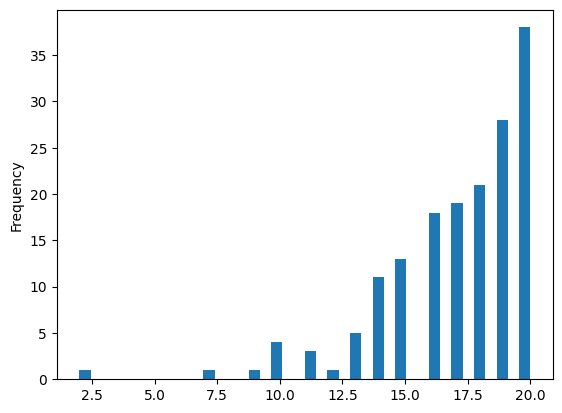

In [2]:
# get all folder in PROCESSED_PHOTOS_FOLDER

folders = os.listdir(FORMATTED_PHOTO_FOLDER)
# remove files from the list
folders = [folder for folder in folders if os.path.isdir(os.path.join(FORMATTED_PHOTO_FOLDER, folder))]

# for each folder, count number of files, and add to a list
data = []
for folder in folders:
    files = os.listdir(os.path.join(FORMATTED_PHOTO_FOLDER, folder))
    data.append((folder, len(files)))
    
# create a dataframe from the list
df = pd.DataFrame(data, columns=['folder', 'count'])

# plot the data, histogram
df.plot(kind='hist', x='folder', y='count', legend=False, bins=40)

In [3]:
# save all folder with not less than 10 files to SELECTED_FOLDERS_FOR_MODEL file
selected_folders = df[df['count'] >= 10]['folder']

In [4]:
train_folders = selected_folders.sample(frac=0.8)
test_folders = selected_folders.drop(train_folders.index)

# create a dataframe from the list, and column to indicate if it is for training or testing
train_df = pd.DataFrame(train_folders, columns=['folder'])
train_df['type'] = 'train'
test_df = pd.DataFrame(test_folders, columns=['folder'])
test_df['type'] = 'test'

# combine the two dataframes
combined_df = pd.concat([train_df, test_df])

In [5]:
combined_df

,folder,type
114,378431,train
31,286514,train
63,317171,train
92,331179,train
57,309480,train
...,...,...
118,397885,test
133,435214,test
138,443822,test
158,567650,test


In [6]:
combined_df.to_csv(SELECTED_FOLDERS_FOR_MODEL, index=False)